In [49]:
# Global variables 
DATA_PATH_PQT = "data/askreddit_whats_your_reason_for_not_drinking_alcohol.parquet"
SAVE_PATH_PQT = "data/askreddit_whats_your_reason_for_not_drinking_alcohol_clean_text.parquet"

In [4]:
from datetime import datetime
import pandas as pd

In [6]:
comments = pd.read_parquet(DATA_PATH_PQT)
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   main_submission_id    19326 non-null  object        
 1   comment_author        19326 non-null  object        
 2   comment_body          19326 non-null  object        
 3   comment_id            19326 non-null  object        
 4   comment_date_time     19326 non-null  datetime64[ns]
 5   comment_score         19326 non-null  int64         
 6   comment_parent_id     19326 non-null  object        
 7   comment_subreddit     19326 non-null  object        
 8   comment_permalink     19326 non-null  object        
 9   comment_is_submitter  19326 non-null  bool          
 10  comment_replies       19326 non-null  object        
 11  comment_depth         19326 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 1.6+ MB


In [7]:
from text_cleaning_functions import remove_urls, expand_contractions, remove_img_and_gifs, remove_reddit_references, remove_punctuation, remove_emoticons

comments['comment_body_clean'] = comments['comment_body'].apply(remove_urls)
comments['comment_body_clean'] = comments['comment_body_clean'].apply(remove_reddit_references)
comments['comment_body_clean'] = comments['comment_body_clean'].apply(remove_img_and_gifs)
comments['comment_body_clean'] = comments['comment_body_clean'].apply(expand_contractions)
comments['comment_body_clean'] = comments['comment_body_clean'].apply(remove_emoticons)
comments['comment_body_clean'] = comments['comment_body_clean'].apply(remove_punctuation)  # this function also removes strange characters and repeated chars and lower cases the text

# check if after cleaning there are emoty text comments
comments[comments['comment_body_clean'] == '']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andreeanistor/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andreeanistor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/andreeanistor/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/andreeanistor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,main_submission_id,comment_author,comment_body,comment_id,comment_date_time,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth,comment_body_clean
3755,1hg10tp,Mission_Ad8012,https://youtu.be/fdQ-iQbuKJk?feature=shared,m2gyifw,2024-12-17 09:24:51,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],0,
9677,1hg10tp,jadewolf456,🤰🏻,m2ihynd,2024-12-17 16:23:37,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],0,
10786,1hg10tp,GaizenX,$$$,m2iuw0g,2024-12-17 17:32:18,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],0,
14450,1hg10tp,T1m3Wizard,$$$,m2laarg,2024-12-18 01:37:41,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],0,
16909,1hg10tp,Careless_Fondant3388,👍😀,m2iat0k,2024-12-17 15:45:01,2,t1_m2ft95c,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],1,
17180,1hg10tp,IntrovertedIngenue,🤣🤣🤣🤣🤣,m2ge17o,2024-12-17 05:51:19,10,t1_m2fr16d,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],1,
17538,1hg10tp,AlwaysTheGarden,💚💚💚,m2h1yx8,2024-12-17 10:04:34,2,t1_m2ghtxn,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],1,
19004,1hg10tp,jaybsuave,🎠🎠,m2itrd1,2024-12-17 17:26:20,3,t1_m2iqwqx,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,[],4,


In [8]:
# check length of clean text in charracters
comments['comment_body_clean'].apply(len).describe()

count    19326.000000
mean       147.690728
std        217.054430
min          0.000000
25%         32.000000
50%         81.000000
75%        179.000000
max       4894.000000
Name: comment_body_clean, dtype: float64

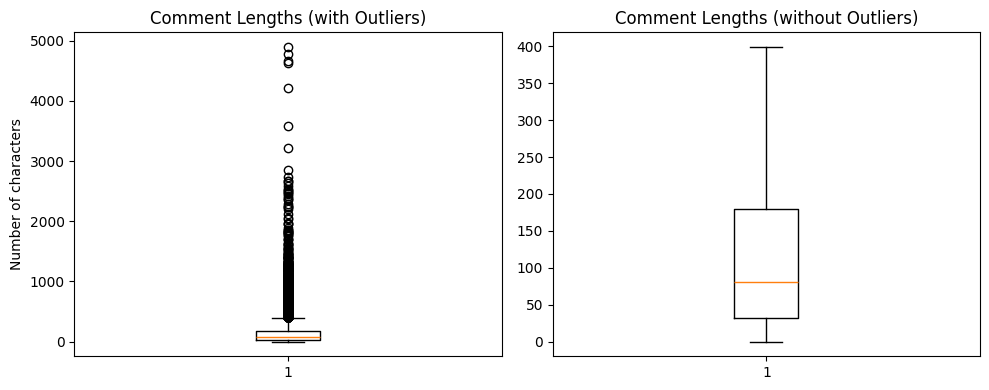

In [23]:
import matplotlib.pyplot as plt

comment_lengths = comments['comment_body_clean'].apply(len)

# Create a figure with two subplots side by side
plt.figure(figsize=(10, 4))

# First plot: box plot showing outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.boxplot(comment_lengths, vert=True, showfliers=True)
plt.title('Comment Lengths (with Outliers)')
plt.ylabel('Number of characters')

# Second plot: box plot without outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.boxplot(comment_lengths, vert=True, showfliers=False)
plt.title('Comment Lengths (without Outliers)')

plt.tight_layout()
plt.show()


#  some comments are very long ( outliers -> these will be truncated in the topic analysys)
# most comments between 50 and 200 characters long

In [26]:
# remove any clean text that has less than 30 characters
comments = comments[comments['comment_body_clean'].apply(len) >= 30].reset_index(drop=True)
comments.info()

# 14858 unique comments included after text cleaning 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14858 entries, 0 to 14857
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   main_submission_id    14858 non-null  object        
 1   comment_author        14858 non-null  object        
 2   comment_body          14858 non-null  object        
 3   comment_id            14858 non-null  object        
 4   comment_date_time     14858 non-null  datetime64[ns]
 5   comment_score         14858 non-null  int64         
 6   comment_parent_id     14858 non-null  object        
 7   comment_subreddit     14858 non-null  object        
 8   comment_permalink     14858 non-null  object        
 9   comment_is_submitter  14858 non-null  bool          
 10  comment_replies       14858 non-null  object        
 11  comment_depth         14858 non-null  int64         
 12  comment_body_clean    14858 non-null  object        
dtypes: bool(1), date

In [34]:
# check some random comments to ensure text was clean properly
from random import randint

n = randint(0, 14857)
comments['comment_body_clean'].iloc[n]

'my parents were alchoholics and i only have bad memoroes from it dont want to be the blundering fools they were'

In [46]:
# check the very long comments
from tabulate import tabulate

long_comments = comments[comments['comment_body_clean'].apply(len) >= 4000][['comment_author', 'comment_body_clean']]
print(tabulate(long_comments.head(), headers='keys', tablefmt='plain'))

       comment_author    comment_body_clean
  690  MrVermin          i drank heavily since high school and i have been to rehab 3 times am now 32 there is a multitude of reasons i cut it out of my life forever like money messes my job my wife etc but the main reason i am sober now is because of my final rehab visit all 3 times i let myself slip and get to the point of physical addiction where i needed alcohol every hour of the day otherwise i would start withdrawing immediate shaking cold sweats nausea loss of balance brain fog searing pains in random places paranoia increased heart rate and blood pressure feelings of impending doom the fun stuff well all of that was not enough to get me to put the bottle down because i was severely depressed and was praying that i would just pass out one day and never wake up that never happened years passed and i tried inpatient rehab a couple of times after randomly feeling motivated to quit and because i knew i would die if i tried cold turkey but 

In [50]:
# save the clean dataset
comments.to_parquet(SAVE_PATH_PQT, engine='pyarrow')